In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/Colab\ Notebooks/Minor\ Project\ Sem\ 6/

/content/drive/MyDrive/Colab Notebooks/Minor Project Sem 6


In [ ]:
!ls

duc2002finaldataset_0.csv  Formatted.ipynb  main.ipynb


In [ ]:
import pandas as pd
import numpy as np

import nltk
import spacy
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

from ast import literal_eval # to convert array string to array

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
!python -m spacy download en_core_web_lg
nltk.download('punkt')
nltk.download('stopwords')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-15 11:00:37.775463: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-15 11:00:37.775714: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-15 11:00:37.775752: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!pip install 'scipy>=1.8'
!pip install 'networkx<2.7'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Read Data

In [ ]:
df = pd.read_csv('duc2002finaldataset_0.csv')
df.drop('Summary', axis=1, inplace=True)
df.head()

,Article
0,"['On the day of the Big Event, Ladbroke, the l..."
1,"[""Australian novelist Peter Carey was awarded ..."
2,"[""Six novels have been nominated for the Booke..."
3,"[""Japanese writer Kazuo Ishiguro won the 1989 ..."
4,"[""The Booker Prize is Britain's literary event..."


In [ ]:
article = literal_eval(df['Article'][1])
article = [sen.lower() for sen in article]

## Remove all stopwords

In [ ]:
sw = stopwords.words('english') 

def remove_stopwords(article):
  filtered_article = []
  for sen in article:
    words = word_tokenize(sen)
    filtered_article.append({w for w in words if w.isalpha() and w.lower() not in sw})
    # print(filtered_article[-1])
  return filtered_article

# Open relation - DONE

Remove all stopwords and calculate length ratio in all sentences

In [ ]:
def open_relation(article):
  length = []
  for sentence in article:
    word_tokens = word_tokenize(sentence)
    filtered_words = [word for word in word_tokens if word.lower() not in stopwords.words('english') and len(word)>1]
    length.append(len(filtered_words))
  length = np.array(length)
  max_len = max(length)
  length = length / max_len
  return length


open_relation_mat = open_relation(article) # for each sentence in the article array
open_relation_mat

array([0.68, 0.6 , 0.48, 0.68, 0.6 , 0.44, 0.76, 0.36, 0.32, 0.56, 0.32,
       1.  , 0.4 , 0.16, 0.8 , 0.28, 0.2 , 0.52])

# TF-ISF - DONE

In [ ]:
import re
from math import log2

In [ ]:
def tf(t, article):
  return len(re.findall(t.lower(), ".".join(article).lower()))

tf('Australian', article)

3

In [ ]:
def sf(t, article):
  return len([sentence for sentence in article if t.lower() in sentence])

def isf(t, article):
  return log2(len(article)/sf(t, article))

In [ ]:
isf('Australian', remove_stopwords(article))

2.584962500721156

In [ ]:
def tf_isf(article):
  mat = []
  for sen in article:
    vec = []
    for word in sen:
      vec.append(isf(word, article))
    print(vec)
    mat.append(vec)
  return mat

In [ ]:
tf_isf_mat = tf_isf(article)

[0.0, 0.2630344058337938, 0.0, 0.0, 0.0, 0.0, 0.16992500144231237, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.36257007938470837, 0.0, 0.16992500144231237, 0.0, 0.0, 0.0, 0.0, 0.4694852833012202, 0.0, 0.0, 0.0, 0.0, 0.0, 0.36257007938470837, 0.0, 0.0, 0.0, 0.16992500144231237, 0.0, 0.08246216019197297, 0.0, 0.0, 0.0, 0.0, 0.08246216019197297, 0.0, 0.0, 0.2630344058337938, 0.0, 0.2630344058337938, 0.0, 0.0, 0.08246216019197297, 0.0, 0.0, 0.36257007938470837, 0.0, 0.36257007938470837, 0.0, 0.0, 0.0, 0.2630344058337938, 0.0, 0.08246216019197297, 0.0, 0.0, 0.7104933828050152, 0.0, 0.0, 0.0, 0.4694852833012202, 0.0, 0.0, 1.84799690655495, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.36257007938470837, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2630344058337938, 0.0, 0.0, 0.2630344058337938, 0.0, 0.16992500144231237, 0.0, 0.0, 0.0, 0.2630344058337938, 0.08246216019197297, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08246216019197297, 0.0, 0.0, 0.0, 0.16992500144231237, 0.0, 0.36257007938470837, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16

# Cosine similarity using tf_isf

In [ ]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from keras_preprocessing.sequence import pad_sequences

In [ ]:
# Pad vectors to have the same length
padded_vectors = np.array(pad_sequences(tf_isf_mat, padding='post', value=0, dtype='float'))

# Compute cosine similarity between each pair of vectors
cosine_similarity_mat = cosine_similarity(padded_vectors)

In [ ]:
len(cosine_similarity_mat), len(cosine_similarity_mat[0]), len(tf_isf_mat)

(18, 18, 18)

In [ ]:
for i in cosine_similarity_mat:
  print(i)

[1.         0.24339475 0.0357389  0.10785693 0.11880336 0.11121032
 0.08919023 0.18531892 0.03209488 0.05529398 0.09407818 0.03668517
 0.24162614 0.01902946 0.06374743 0.00652237 0.11679999 0.05689927]
[0.24339475 1.         0.02223043 0.09246809 0.12280016 0.10199854
 0.16307276 0.07298347 0.08334558 0.09012077 0.29302448 0.06875844
 0.09173389 0.01620112 0.09076341 0.11460956 0.03737473 0.06062226]
[0.0357389  0.02223043 1.         0.14149072 0.0559091  0.07096717
 0.2529473  0.05249867 0.05700103 0.04138244 0.02687368 0.04345953
 0.09069573 0.02375198 0.0313173  0.02984453 0.37909326 0.14025542]
[0.10785693 0.09246809 0.14149072 1.         0.19750683 0.20084091
 0.16427811 0.12458382 0.10830277 0.08219263 0.0471382  0.0895641
 0.14537817 0.0950766  0.06923492 0.06275722 0.02668345 0.15670687]
[0.11880336 0.12280016 0.0559091  0.19750683 1.         0.08918187
 0.15014435 0.48350707 0.06461164 0.10158653 0.03540231 0.11252435
 0.41899528 0.05384784 0.08307029 0.05076796 0.12802799 0.2

In [ ]:
# Compute cosine similarity between each pair of vectors

cosine_similarity_mat = np.array(cosine_similarity_mat)

# Convert similarity values to distances
distances = 1 - cosine_similarity_mat
distances = np.round(distances.clip(min=0), 2)
distances

array([[0.  , 0.76, 0.96, 0.89, 0.88, 0.89, 0.91, 0.81, 0.97, 0.94, 0.91,
        0.96, 0.76, 0.98, 0.94, 0.99, 0.88, 0.94],
       [0.76, 0.  , 0.98, 0.91, 0.88, 0.9 , 0.84, 0.93, 0.92, 0.91, 0.71,
        0.93, 0.91, 0.98, 0.91, 0.89, 0.96, 0.94],
       [0.96, 0.98, 0.  , 0.86, 0.94, 0.93, 0.75, 0.95, 0.94, 0.96, 0.97,
        0.96, 0.91, 0.98, 0.97, 0.97, 0.62, 0.86],
       [0.89, 0.91, 0.86, 0.  , 0.8 , 0.8 , 0.84, 0.88, 0.89, 0.92, 0.95,
        0.91, 0.85, 0.9 , 0.93, 0.94, 0.97, 0.84],
       [0.88, 0.88, 0.94, 0.8 , 0.  , 0.91, 0.85, 0.52, 0.94, 0.9 , 0.96,
        0.89, 0.58, 0.95, 0.92, 0.95, 0.87, 0.77],
       [0.89, 0.9 , 0.93, 0.8 , 0.91, 0.  , 0.93, 0.83, 0.62, 0.89, 0.97,
        0.94, 0.92, 0.99, 0.94, 0.93, 0.99, 0.82],
       [0.91, 0.84, 0.75, 0.84, 0.85, 0.93, 0.  , 0.93, 0.97, 0.5 , 0.83,
        0.87, 0.88, 0.98, 0.94, 0.96, 0.89, 0.86],
       [0.81, 0.93, 0.95, 0.88, 0.52, 0.83, 0.93, 0.  , 0.89, 0.99, 0.89,
        0.94, 0.57, 0.94, 0.93, 0.92, 0.98, 0.86],


# Aggregation Similarity - DONE

In [ ]:
aggregation_similarity_mat = [sum(i) for i in cosine_similarity_mat]

In [ ]:
print(aggregation_similarity_mat)

[2.614290279899948, 2.765502458577051, 2.4954571930251253, 2.912060343287403, 3.4952022752688463, 2.777639422823044, 3.2676077287812215, 3.273728501554642, 2.2953676737655706, 2.4353178801038906, 2.105656078112977, 2.171933032973883, 3.500195576415211, 1.627673878708812, 2.0268087306914486, 2.0406048379049775, 2.2138291396547416, 3.026078169235294]


# Bushy Path 

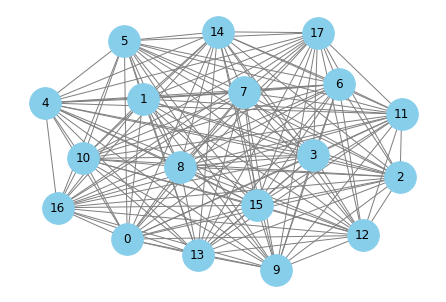

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


# Create graph
G = nx.from_numpy_array(distances)

# Plot graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1000, edge_color='gray')
plt.show()


## We can also use coordinate format matrix

In [ ]:
from scipy.sparse import coo_matrix

m = distances.copy()
for i in range(len(m)):
  for j in range(len(m[i])):
    if m[i][j] < 0.9:
      m[i][j] = 0

sparse_matrix = coo_matrix(m)
sparse_matrix

<18x18 sparse matrix of type '<class 'numpy.float64'>'
	with 206 stored elements in COOrdinate format>

In [ ]:
# <18x18 sparse matrix of type '<class 'numpy.float64'>'	with 306 stored elements in COOrdinate format>
# Means 306 nodes are there

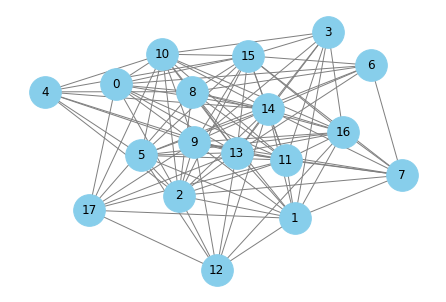

In [ ]:
# Create graph
G = nx.from_scipy_sparse_matrix(sparse_matrix)

# Plot graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1000, edge_color='gray')
plt.show()

In [ ]:
bushy_path_mat = [value for i, value in G.degree]
bushy_path_mat

[10, 12, 13, 8, 8, 11, 7, 9, 12, 14, 13, 14, 8, 17, 16, 14, 12, 8]

# Page rank of the nodes

In [ ]:
# Compute PageRank of nodes
pagerank = nx.pagerank(G, max_iter=100, alpha=0.85)

# Print PageRank scores
print("PageRank scores:")
pagerank

PageRank scores:


{0: 0.04939820015703232,
 1: 0.057100596962687794,
 2: 0.06224019453681939,
 3: 0.03987011136398948,
 4: 0.040130738228608326,
 5: 0.053358484837597225,
 6: 0.03688181329531191,
 7: 0.04491616222027835,
 8: 0.05865695801307036,
 9: 0.06643577233040006,
 10: 0.06299931247010283,
 11: 0.06580734537636743,
 12: 0.04035952904465123,
 13: 0.0802553827282775,
 14: 0.07460396529330067,
 15: 0.06706016417599836,
 16: 0.059135590889475925,
 17: 0.04078967807603068}

# Summary according to the current method

In [ ]:
ranked_sentences = sorted(((pagerank[i],s) for i,s in enumerate(article)), reverse=True)

In [ ]:
# Extract top 5 sentences as the summary
for i in range(5):
  print(ranked_sentences[i][1])

carey was the only non-briton in the final six.
the son of an auto dealer, he was born in bacchus marsh, victoria, and attended geelong church of england grammar school, melbourne, where the prince of wales was also a pupil as an 18-year-old in 1966.
carey was an advertising copywriter before turning to writing books in 1965.
it tells of a romance between an english gambler and an australian heiress who meet on a steamship's maiden voyage to australia in the mid-19th century.
panel chairman michael foot, a writer and former leader of the opposition labor party, said the judges agreed that entries this year had been ``exceptionally strong'' and that choosing the last six novels was extremely difficult.


# Page rank - using custom function

PR(A) = (1-d) + d (PR(T1)/C(T1) + ... + PR(Tn)/C(Tn))

d - damping factor

In [ ]:
# Adjecency list calucate
m = [[] for _ in range(len(distances))]

for i in range(len(distances)):
  for j in range(len(distances[i])):
    if distances[i][j] >= 0.9:
      m[i].append(j)

print(m)

[[2, 6, 8, 9, 10, 11, 13, 14, 15, 17], [2, 3, 5, 7, 8, 9, 11, 12, 13, 14, 16, 17], [0, 1, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15], [1, 9, 10, 11, 13, 14, 15, 16], [2, 5, 8, 9, 10, 13, 14, 15], [1, 2, 4, 6, 10, 11, 12, 13, 14, 15, 16], [0, 5, 7, 8, 13, 14, 15], [1, 2, 6, 9, 11, 13, 14, 15, 16], [0, 1, 2, 4, 6, 10, 11, 13, 14, 15, 16, 17], [0, 1, 2, 3, 4, 7, 10, 11, 12, 13, 14, 15, 16, 17], [0, 2, 3, 4, 5, 8, 9, 11, 13, 14, 15, 16, 17], [0, 1, 2, 3, 5, 7, 8, 9, 10, 13, 14, 15, 16, 17], [1, 2, 5, 9, 13, 14, 16, 17], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16], [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16], [1, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15], [0, 1, 8, 9, 10, 11, 12, 13]]


In [ ]:
# Page rank Function

def pageRank(m, it=100, d=0.85):
  n = len(m)
  rank = [1 for _ in range(n)]

  # Calculate rank for each iteration
  for _ in range(it):
    for i in range(n):
      rank[i] = (1-d) + d * sum([rank[x]/len(m[x]) for x in m[i]])

  return rank

pagerank_scores = pageRank(m)
print(pagerank_scores)

[0.8900569417037099, 1.0450170662734415, 1.11510570525168, 0.7310421237894867, 0.7329544378902367, 0.9687559697765797, 0.6667770968897482, 0.811961826543237, 1.0445824890151076, 1.1965859587009442, 1.11581057416604, 1.1893856368087996, 0.7398658894291145, 1.4276678917150196, 1.3486232463907086, 1.1950777702172415, 1.0392476818336602, 0.7414816936052308]


# Getting summary according to page rank with above method

In [ ]:
ranked_sentences = sorted(((pagerank_scores[i],s) for i,s in enumerate(article)), reverse=True)

In [ ]:
# Extract top 5 sentences as the summary
for i in range(5):
  print(ranked_sentences[i][1])

carey was the only non-briton in the final six.
the son of an auto dealer, he was born in bacchus marsh, victoria, and attended geelong church of england grammar school, melbourne, where the prince of wales was also a pupil as an 18-year-old in 1966.
it tells of a romance between an english gambler and an australian heiress who meet on a steamship's maiden voyage to australia in the mid-19th century.
carey was an advertising copywriter before turning to writing books in 1965.
panel chairman michael foot, a writer and former leader of the opposition labor party, said the judges agreed that entries this year had been ``exceptionally strong'' and that choosing the last six novels was extremely difficult.


# Text Rank - Using power method

In [ ]:
# initialize with 1/n for all the scores
# in the graph set value as 1/neighbours for each connected edge in the graph

In [ ]:
def power_method(adj_list, alpha=0.85, max_iter=1000, tol=1e-6):
    """
    Calculates the PageRank scores using the power method algorithm.

    Parameters:
    adj_list (dict): An adjacency list representation of the graph.
    alpha (float): The damping factor for the PageRank calculation (default: 0.85).
    max_iter (int): The maximum number of iterations to run the algorithm (default: 1000).
    tol (float): The convergence tolerance for the algorithm (default: 1e-6).

    Returns:
    A dictionary mapping node IDs to their PageRank scores.
    """

    n = len(adj_list)  # number of nodes
    scores = np.full(n, 1 / n)  # initialize scores with 1/n

    # construct the transition matrix
    transition_matrix = np.zeros((n, n))
    for i, node in enumerate(adj_list):
        if adj_list[i]:
            num_neighbors = len(adj_list[i])
            for neighbor in adj_list[i]:
                transition_matrix[i, neighbor] = 1 / num_neighbors
        else:
            # if the node has no outgoing links, treat it as a sink and make
            # the transition probabilities equal for all nodes
            transition_matrix[i] = np.full(n, 1 / n)

    # run the power method algorithm
    for i in range(max_iter):
        prev_scores = scores
        scores = (1 - alpha) / n + alpha * np.dot(transition_matrix, scores)
        if np.linalg.norm(scores - prev_scores, 1) < tol:
            break

    # return the PageRank scores as a dictionary
    return scores


In [ ]:
power_method(m)

array([0.05555556, 0.05555556, 0.05555556, 0.05555556, 0.05555556,
       0.05555556, 0.05555556, 0.05555556, 0.05555556, 0.05555556,
       0.05555556, 0.05555556, 0.05555556, 0.05555556, 0.05555556,
       0.05555556, 0.05555556, 0.05555556])

# Converting features to the csv file for a perticular article

1. Open Relaton
2. Aggregation Similarity
3. Bushy Path
4. Page Rank (Text Rank)

In [ ]:
features_df = pd.DataFrame()
features_df

""


In [ ]:
features_df['Open Relation'] = open_relation_mat
features_df['Aggregation Similarity'] = aggregation_similarity_mat
features_df['Bushy Path'] = bushy_path_mat
features_df['Text Rank'] = pagerank_scores

features_df

,Open Relation,Aggregation Similarity,Bushy Path,Text Rank
0,0.68,2.614290,10,0.890057
1,0.60,2.765502,12,1.045017
2,0.48,2.495457,13,1.115106
3,0.68,2.912060,8,0.731042
4,0.60,3.495202,8,0.732954
5,0.44,2.777639,11,0.968756
6,0.76,3.267608,7,0.666777
7,0.36,3.273729,9,0.811962
8,0.32,2.295368,12,1.044582
9,0.56,2.435318,14,1.196586


# Create a csv file for above feature corresponding to each article and each sentance

# Merge features values csv

To make total 16 features

## Calculate similarity of each sentence with its corresponding article summary (Target value)

using bert

using rouge - 1,2,L

## Apply linear regression

read about rfe (Recursive feture elimitation for regression)

### Split data

### Model creation

## generate the summary of test data

Say for >40%

## use rouge or bert on generated summary and given summary